In [1]:
from roboflow import Roboflow
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_path = './30939153.jpg'

In [3]:
def door_detection(img_path = './30939153.jpg'):
    doors = []
    try:
        img = cv2.imread(img_path)
        #detection
        rf = Roboflow(api_key="7W0fIqzuiJGplpXG0C5L")

        workspace = rf.workspace("kuanghiu")

        project = workspace.project("door-yvyzd")

        version = project.version(1)

        model = version.model

        prediction = model.predict(img_path)

        json_file = prediction.json()
        #save results
        for it in json_file['predictions']:
            door = np.zeros((img.shape[0],img.shape[1]))
            door[int(it['y'] - it['height']/2) : int(it['y']+it['height']/2), int(it['x']- it['width']/2) : int(it['x'] + it['width']/2)] = 255
            doors.append(door)
        print('Detect door sussecful. Have {} doors in plan'.format(len(doors)))
    except:
        print('Something wrong. We dont find any door in plan')
    return doors
    

In [6]:
results = door_detection(img_path = '2.jpg')

loading Roboflow workspace...
loading Roboflow project...
Detect door sussecful. Have 7 doors in plan


In [5]:
img = cv2.imread('2.jpg')

In [7]:
im = np.zeros((img.shape[0],img.shape[1]))
for i in range(len(results)):
    im = im + results[i]

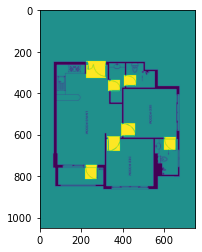

In [8]:
plt.imshow(im + img[:,:,0])

In [54]:
from PIL import Image

In [61]:
img_path = './23251.png'
temp = Image.open(img_path)
img = np.asarray(temp, dtype=np.uint8)

In [63]:
img[:,:,0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [69]:
uni, count = np.unique(img[:,:,2],return_counts = True)
print(uni)
print(count)

[0 1 2 3 4 5 6 7 8]
[48281  1016   312  1075  2441  1716  2989  1216  6490]
